# **SEATWORK 7.1 Data Wrangling and Notebook Demonstration**

**Name**: Calingo, Christian Lei S.

**Section**: CPE22S3

**Course**: Computational Thinking With Python

**Course Code** : CPE311

# **7.3 (CLEANING DATA)**

# **Setup**
---
[**We need to import pandas and read in our data to get started:**](https://)




In [8]:
import pandas as pd
df = pd.read_csv('data/nyc_temperatures.csv') #importing our csv file
df.head()#viewing the first 5 data from our csv file

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


# **Renaming Columns**


---


[**We start out with the following columns:**](https://)

In [9]:
df.columns #checking the name of the columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

**We want to rename the value column to indicate it contains the temperature in Celsius and the attributes column to say flags since each value in the comma-
delimited string is a different flag about the data collection. For this task, we use the rename() method and pass in a dictionary mapping the column names to their new
names. We pass inplace=True to change our original dataframe instead of getting a new one back:**

In [10]:
df.rename(
columns={ #a dictionary that allows us to change the name of the columns, the key is its previous name and the value its new name
'value' : 'temp_C',
'attributes' : 'flags'
}, inplace=True
)

In [11]:
df.columns #checking the name of the columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

[**We can also perform string operations on the column names with rename()**](https://)

In [12]:
df.rename(str.upper, axis='columns').columns #using the .rename() function to rename the columns
                                             #upper function of python allows us to change strings into capital letters

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

# **Type Conversion**


---


**[Chaging the data type of date column](https://)**

In [13]:
df.dtypes #checking the data types

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [14]:
df.loc[:,'date'] = pd.to_datetime(df.date) #.loc allows us to locate the column that we will change
                                           #a function of panda named .to_datetime allows us to change the data type
df.dtypes

<ipython-input-14-2ac2a081adff>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'date'] = pd.to_datetime(df.date) #.loc allows us to locate the column that we will change


date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

[**Now we get useful information when we use describe() on this column:**](https://)

In [15]:
df.date.describe() #describing the date column

<ipython-input-15-f01f2e3fe37f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe() #describing the date column


count                      93
unique                     31
top       2018-10-01 00:00:00
freq                        3
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

**Trying other columns**

In [16]:
df.station.describe() #describing the data column

count                    93
unique                    1
top       GHCND:USW00014732
freq                     93
Name: station, dtype: object

In [17]:
df.datatype.describe() #describing the datatype column

count       93
unique       3
top       TAVG
freq        31
Name: datatype, dtype: object

In [18]:
df.temp_C.describe() #describing the temp_C column

count    93.000000
mean     15.408602
std       6.133703
min       5.600000
25%      10.200000
50%      14.400000
75%      21.100000
max      27.800000
Name: temp_C, dtype: float64

In [19]:
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [20]:
df.flags.describe() # trying to describe the flags column but it failed

AttributeError: 'Flags' object has no attribute 'describe'

[**Using tz_localize() on a DatetimeIndex / PeriodIndex to convert to a desired timezone:**](https://)

In [21]:
pd.date_range(start='2018-10-25', periods=2, freq='D').tz_localize('EST')
#pd.date_range allows us to manipulate certain date ranges of our date values

#the first parameter which is start, allows us to set a strating point

#the periods is the amount of the days to generate in the range, period = 2 (2018-10-25 and 2018-10-26)

#freq is the frequency of our date range, D = Days, so the periods is in the range of days

#tz_localize is to localize the timezone


DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

**Changing the range period:**

**-> Trying Year/Years for frequency**

**-> Trying Month/Months for frequency**

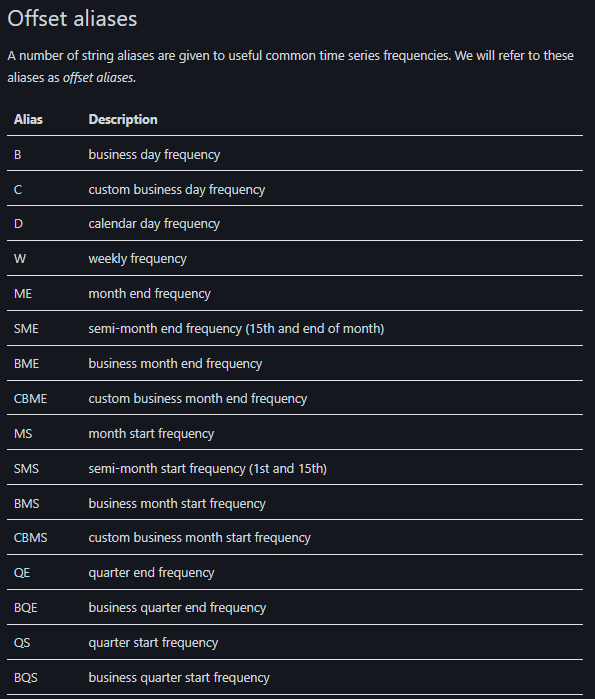
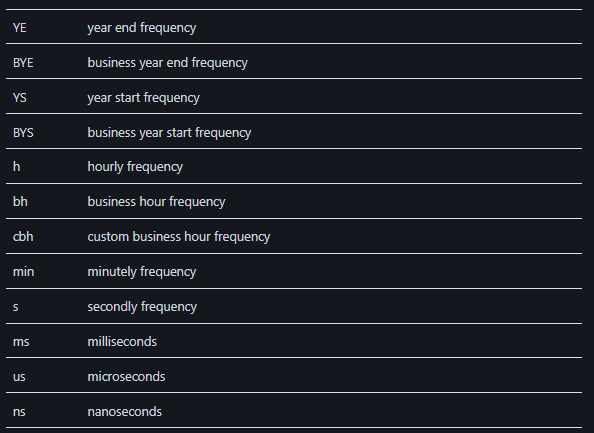

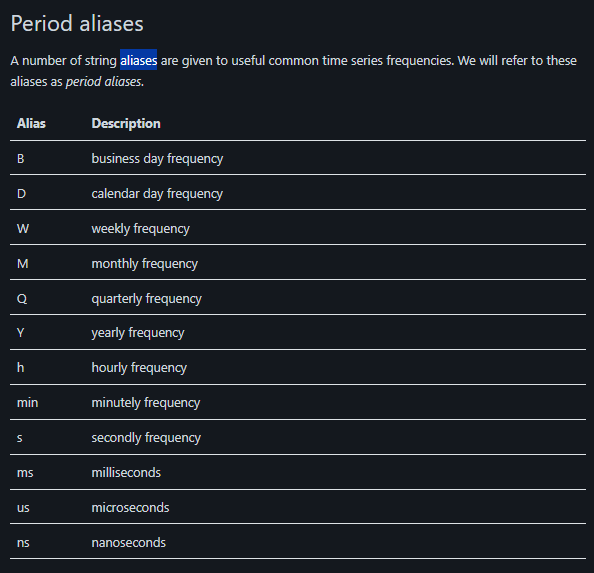

In [22]:
pd.date_range(start='2018-10-25', periods=10, freq='A').tz_localize('EST')
#the date changed from 10-25 to 12-31 since the freq = A sets the date at the end of the year
#changing frequency to A which equates to Year end
#setting the periods to 10 so that we can have the range of 10 different years
#(2018,2019,2020,2021,2022,2023,2024,2025,2026,2027) -> 10 different years

DatetimeIndex(['2018-12-31 00:00:00-05:00', '2019-12-31 00:00:00-05:00',
               '2020-12-31 00:00:00-05:00', '2021-12-31 00:00:00-05:00',
               '2022-12-31 00:00:00-05:00', '2023-12-31 00:00:00-05:00',
               '2024-12-31 00:00:00-05:00', '2025-12-31 00:00:00-05:00',
               '2026-12-31 00:00:00-05:00', '2027-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, EST]', freq=None)

In [23]:
pd.date_range(start='2018-10-25', periods=6, freq='M').tz_localize('EST')
#the date changed from 10-25 to 10-31 since the freq = M sets the date at the end of the month
#changing frequency to M which equates to Month end
#the range of the date is now changed to monthly

DatetimeIndex(['2018-10-31 00:00:00-05:00', '2018-11-30 00:00:00-05:00',
               '2018-12-31 00:00:00-05:00', '2019-01-31 00:00:00-05:00',
               '2019-02-28 00:00:00-05:00', '2019-03-31 00:00:00-05:00'],
              dtype='datetime64[ns, EST]', freq=None)

[**This also works with a Series / DataFrame with one of the aforementioned as its Index . Let's read in the CSV again for this example and set the date column to be the
index and stored as a datetime:**](https://)

In [24]:
eastern = pd.read_csv('data/nyc_temperatures.csv', index_col='date', parse_dates=True).tz_localize('EST')
eastern

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1
...,...,...,...,...
2018-10-30 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",13.9
2018-10-30 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",7.2
2018-10-31 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",12.6


[**We can use tz.convert() to convert to another timezone from there. If we convert the Eastern datetimes to UTC, they will now be at 5 AM, since pandas will use the
offsets to convert**](https://)

In [25]:
eastern.tz_convert('UTC').head() #converting the timezon from EST to UTC using the .tz_convert() syntax

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


[**We can change the period of the index as well. We could change the period to be monthly**](https://)

In [26]:
eastern.to_period('M').index

<ipython-input-26-34a82283fe40>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').index


PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

**Trying to change the Period to:**

**-> Year**

**-> Day**

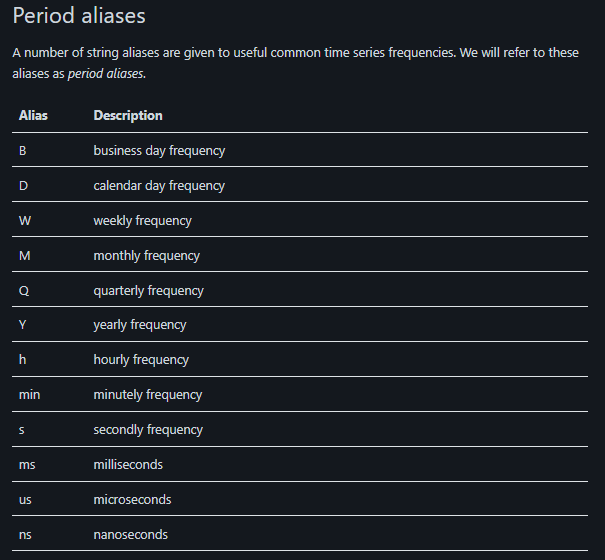

In [27]:
eastern.to_period('Y').index

<ipython-input-27-88e18683a90a>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('Y').index


PeriodIndex(['2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
             '2018', '2018', '2018', '2018', '2018'],
            dtype='period[A-DEC]', name='date')

In [28]:
eastern.to_period('D').index

<ipython-input-28-a826fb427131>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('D').index


PeriodIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-02',
             '2018-10-02', '2018-10-02', '2018-10-03', '2018-10-03',
             '2018-10-03', '2018-10-04', '2018-10-04', '2018-10-04',
             '2018-10-05', '2018-10-05', '2018-10-05', '2018-10-06',
             '2018-10-06', '2018-10-06', '2018-10-07', '2018-10-07',
             '2018-10-07', '2018-10-08', '2018-10-08', '2018-10-08',
             '2018-10-09', '2018-10-09', '2018-10-09', '2018-10-10',
             '2018-10-10', '2018-10-10', '2018-10-11', '2018-10-11',
             '2018-10-11', '2018-10-12', '2018-10-12', '2018-10-12',
             '2018-10-13', '2018-10-13', '2018-10-13', '2018-10-14',
             '2018-10-14', '2018-10-14', '2018-10-15', '2018-10-15',
             '2018-10-15', '2018-10-16', '2018-10-16', '2018-10-16',
             '2018-10-17', '2018-10-17', '2018-10-17', '2018-10-18',
             '2018-10-18', '2018-10-18', '2018-10-19', '2018-10-19',
             '2018-10-19', '2018-1

[**Changing the eastern period back to datetimeindex**](https://)

In [29]:
eastern.to_period('M').to_timestamp().index

<ipython-input-29-22abc5f95bfc>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  eastern.to_period('M').to_timestamp().index


DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

[**We can use the assign() method for working with multiple columns at once (or creating new ones). Since our date column has already been converted, we need to read
in the data again:**](https://)

In [30]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(columns={'value' : 'temp_C','attributes' : 'flags'} #rereading the csv file again
)
new_df = df.assign(
date=pd.to_datetime(df.date),
temp_F=(df.temp_C * 9/5) + 32 #formula for the conversion
) #creating a new dataframe but with the converted Celsius to Fahrenheit
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [31]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


**Using astype() to change the data type of Celsius and Fahrenheit**

In [32]:
df.dtypes #the previous datatypes was float64

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

In [33]:
df = df.assign( #using the assign since multiple columns must be affected
date=pd.to_datetime(df.date),
temp_C_whole=df.temp_C.astype('int'), #changing the data type of the temp_C column to int and creating a new column for it
temp_F=(df.temp_C * 9/5) + 32,
temp_F_whole=lambda x: x.temp_F.astype('int') #changing the data type of the temp_F column to int and creating a new column for it
)
df.head()


,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


[**Changing the data type of station column and data type column to category**](https://)

In [34]:
df_with_categories = df.assign(
station=df.station.astype('category'),
datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [35]:
pd.Categorical(
['med', 'med', 'low', 'high'],
categories=['low', 'med', 'high'],
ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

# **Reordering, reindexing, and sorting**


---



[**Finding the hottest in temperature based on the Celsius Column**](https://)

In [36]:
df.sort_values(by='temp_C', ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74


[**Including the date in the sorting**](https://)

In [37]:
df.sort_values(by=['temp_C', 'date'], ascending=False).head(10)

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74


[**Looking for the top 5 largest values of the temp_C column by using .nlargest() where n = 5**](https://)

In [38]:
df.nlargest(n=5, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


[**Finding the top 5 smallest values of temp_C**](https://)

In [43]:
df.nsmallest(n=5, columns=['temp_C',])

,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
65,2018-10-22,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
77,2018-10-26,TMIN,GHCND:USW00014732,",,W,2400",5.6,5,42.08,42
62,2018-10-21,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
74,2018-10-25,TMIN,GHCND:USW00014732,",,W,2400",6.1,6,42.98,42
53,2018-10-18,TMIN,GHCND:USW00014732,",,W,2400",6.7,6,44.06,44


[**Sampling random data using .sample(). We can provide the random_state to make this reproducible. The index after we do this is
jumbled**](https://)

In [49]:
df.sample(5, random_state=0).index

Int64Index([2, 30, 55, 16, 13], dtype='int64')

**Trying different random_states:**

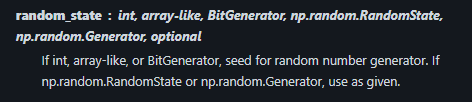

In [51]:
df.sample(5, random_state=5).index

Int64Index([40, 37, 52, 74, 54], dtype='int64')

In [50]:
df.sample(5, random_state=16).index

Int64Index([81, 29, 48, 50, 26], dtype='int64')

**[Using sort index to order the sample](https://)**

In [52]:
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

**Ordering the other random_state**

In [54]:
df.sample(5, random_state=5).sort_index().index

Int64Index([37, 40, 52, 54, 74], dtype='int64')

In [53]:
df.sample(5, random_state=16).sort_index().index

Int64Index([26, 29, 48, 50, 81], dtype='int64')

[**The sort_index() method can also sort columns alphabetically:**](https://)

In [55]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


[**Locating and Selecting columns with loc()**](https://)

In [56]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_F_whole'] #sorting the first 5 index but limited to columns from temp_c to temp_f_whole

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


**Trying different columns for loc**

In [59]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_C_whole'] #sorting the first 5 index but limited to columns from temp_c to temp_c_whole

,temp_C,temp_C_whole
0,21.2,21
1,25.6,25
2,18.3,18
3,22.7,22
4,26.1,26


In [60]:
df.sort_index(axis=1).head().loc[:,'date':'flags'] #sorting the first 5 index but limited to columns from date to flags

,date,flags
0,2018-10-01,"H,,S,"
1,2018-10-01,",,W,2400"
2,2018-10-01,",,W,2400"
3,2018-10-02,"H,,S,"
4,2018-10-02,",,W,2400"


[**Comparing the two dataframes and checking if they are equal using the .equals() syntax** ](https://)

In [61]:
df.equals(df.sort_values(by='temp_C'))

#even if the two data frames have the same data but the index is different, it will not be considered as equal

False

**[Sorting index will help solve the issue](https://)**

In [62]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

**Trying it with the temp_F and temp_F_whole column**

In [67]:
df.equals(df.sort_values(by='temp_F'))

False

In [70]:
df.equals(df.sort_values(by='temp_F').sort_index())

True

In [74]:
df.equals(df.sort_values(by='temp_F_whole'))

False

In [75]:
df.equals(df.sort_values(by='temp_F_whole').sort_index())

True

[**We can also use reset_index() to get a fresh index and move our current index into a column for safe keeping. This is especially useful if we had data, such as the date, in
the index that we don't want to lose**](https://)

In [82]:
df[df.datatype == 'TAVG'].head().reset_index()

#fetching the data that have the average temperature
#the .datatype allows us to access its rows

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2,6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
3,9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
4,12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


**Trying with different columns and rows**

In [84]:
df[df.temp_C_whole == 21].reset_index()

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
2,9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
3,16,2018-10-06,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
4,20,2018-10-07,TMIN,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
5,24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
6,29,2018-10-10,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
7,32,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
8,43,2018-10-15,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69


In [87]:
df[df.temp_C_whole == 21].reset_index()

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
2,9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
3,16,2018-10-06,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
4,20,2018-10-07,TMIN,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
5,24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
6,29,2018-10-10,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
7,32,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
8,43,2018-10-15,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69


In [88]:
df[df.temp_F_whole == 69].reset_index()

,index,date,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
0,16,2018-10-06,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
1,20,2018-10-07,TMIN,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69
2,21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
3,43,2018-10-15,TMAX,GHCND:USW00014732,",,W,2400",21.1,21,69.98,69


In [89]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


[**Now that we have a DatetimeIndex , we can do datetime slicing. As long as we provide a date format that pandas understands, we can grab the data. To select all of 2018,
we simply use df['2018'] , for the third quarter of 2018 we can use ['2018-Q3'] , grabbing October is as simple as using df['2018-10'] ; these can also be
combined to build ranges. Let's grab October 11, 2018 through October 12, 2018 (inclusive of both endpoints)**](https://)

In [90]:
df['2018-10-11':'2018-10-12'] #slicing the data frame from 10-11 to 10-12

,datatype,station,flags,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


**Reindexing allows us to conform our axis to contain a given set of labels. Let's turn to the S&P 500 stock data in the data/sp500.csv file to see an example of this. Notice
we only have data for trading days (weekdays, excluding holidays):**

In [92]:
sp = pd.read_csv(
'data/sp500.csv', index_col='date', parse_dates=True #creating a new data from sp500.csv
).drop(columns=['adj_close']) #dropping the adj_column
sp.head(10).assign(
day_of_week=lambda x: x.index.day_name() #creating a new table for the day of the week
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


[**If we want to look at the value of a portfolio (group of assets) that trade on different days, we need to handle the mismatch in the index. Bitcoin, for example, trades daily.**](https://)

In [94]:
bitcoin = pd.read_csv(
'data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])
# every day's closing price = S&P 500 close + Bitcoin close (same for other metrics)
portfolio = pd.concat(
[sp, bitcoin], sort=False
).groupby(pd.Grouper(freq='D')).sum()
portfolio.head(10).assign(
day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


[**It may not be immediately obvious what is wrong with the previous data, but with a visualization we can easily see the cyclical pattern of drops on the days the stock market is
closed.
We will need to import matplotlib now**](https://)

In [95]:
import matplotlib.pyplot as plt

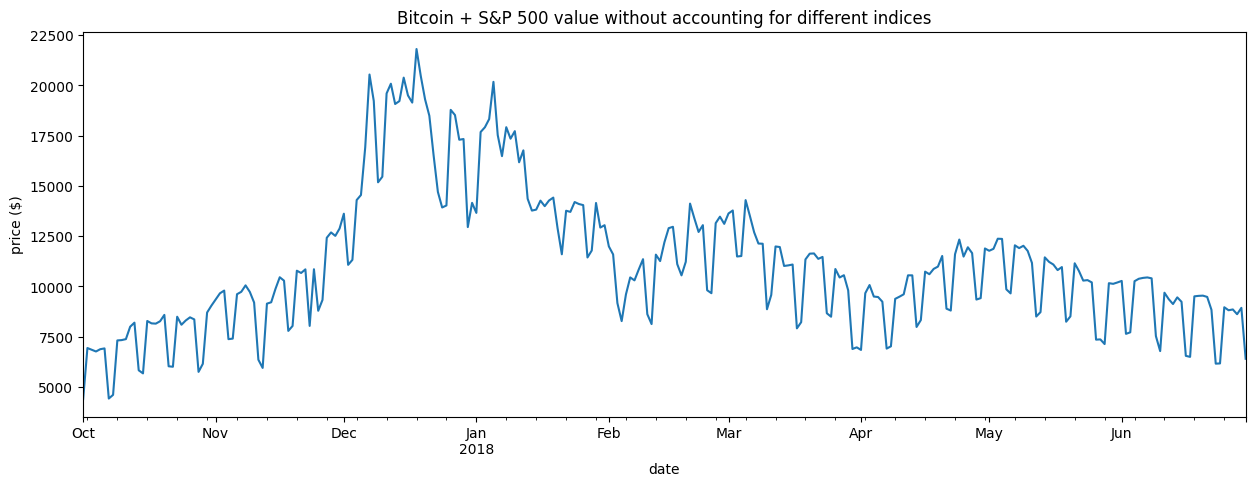

In [96]:
portfolio['2017-Q4':'2018-Q2'].plot(
y='close', figsize=(15, 5), legend=False,
title='Bitcoin + S&P 500 value without accounting for different indices'
) # plot the closing price from Q4 2017 through Q2 2018
plt.ylabel('price ($)') # label the y-axis
plt.show() # show the plot


[**We need to align the index of the S&P 500 to match bitcoin in order to fix this. We will use the reindex() method, but by default we get NaN for the values that we don't
have data for**](https://)

In [97]:
sp.reindex(bitcoin.index).head(10).assign(
day_of_week=lambda x: x.index.day_name()
)


,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,NaN,NaN,NaN,NaN,NaN,Saturday
2017-01-08,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


[**So now we have rows for every day of the year, but all the weekends and holidays have NaN values. To address this, we can specify how to handle missing values with the
method argument. In this case, we want to forward fill, which will put the weekend and holiday values as the value they had for the Friday (or end of trading week) before:**](https://)

In [98]:
sp.reindex(
bitcoin.index, method='ffill'
).head(10).assign(
day_of_week=lambda x: x.index.day_name()
)


,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


[**This isn't perfect though. We probably want 0 for the volume traded and to put the closing price for the open, high, low, and close on the days the market is closed**](https://)

In [100]:
import numpy as np
sp_reindexed = sp.reindex(
bitcoin.index
).assign(
volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
close=lambda x: x.close.fillna(method='ffill'), # carry this forward
# take the closing price if these aren't available
open=lambda x: np.where(x.open.isnull(), x.close, x.open),
high=lambda x: np.where(x.high.isnull(), x.close, x.high),
low=lambda x: np.where(x.low.isnull(), x.close, x.low)
)
sp_reindexed.head(10).assign(
day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


[**If we create visualization comparing the reindexed data to the first attempt, we see how reindexing helped maintain the asset value when the market was closed**](https://)

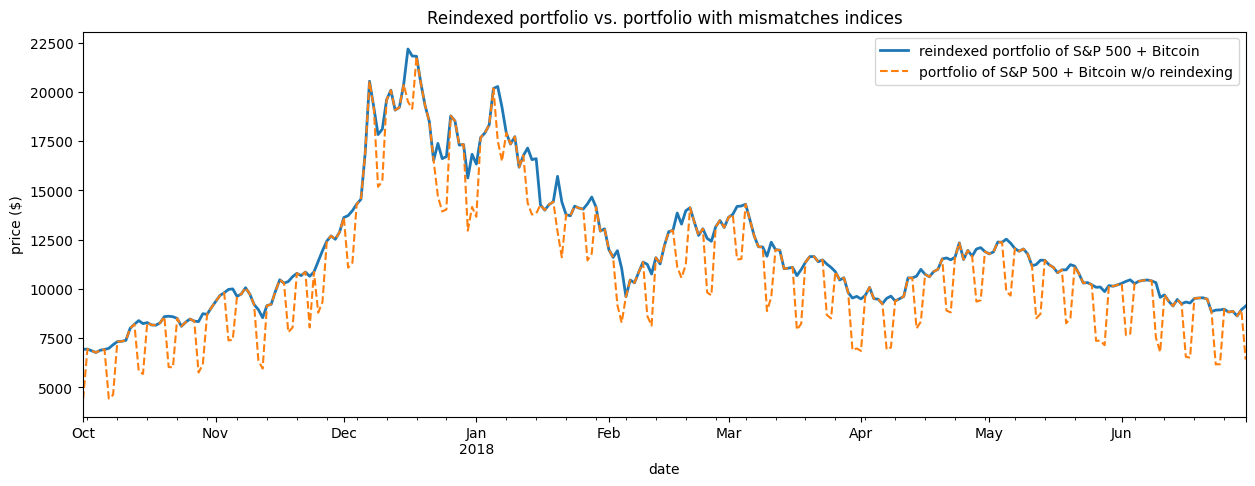

In [101]:
# every day's closing price = S&P 500 close adjusted for market closure + Bitcoin close (same for other metrics)
fixed_portfolio = pd.concat([sp_reindexed, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
y='close', label='reindexed portfolio of S&P 500 + Bitcoin', figsize=(15, 5), linewidth=2,
title='Reindexed portfolio vs. portfolio with mismatches indices'
) # plot the reindexed portfolio's closing price from Q4 2017 through Q2 2018
portfolio['2017-Q4':'2018-Q2'].plot(
y='close', ax=ax, linestyle='--', label='portfolio of S&P 500 + Bitcoin w/o reindexing'
).set_ylabel('price ($)') # add line for original portfolio for comparison and label y-axis
plt.show() # show the plot
